In [1]:
import pandas as pd
from dotenv import load_dotenv
from openai import OpenAI
from anthropic import Anthropic
from src.consts import *

load_dotenv(override=True)
openai = OpenAI()
anthropic = Anthropic() 

In [2]:
import importlib
import src.oracle
importlib.reload(src.oracle)
from src.oracle import generate_oracle_csv

# Regenerate the oracle CSV with automatic MTG data download and caching
print("🔄 Generating oracle CSV with automatic data download...")
generate_oracle_csv('example_oracle.txt', 'output/oracle_output.csv')
print("✅ Oracle CSV generation complete!")

🔄 Generating oracle CSV with automatic data download...
Using cached cards data: .build/cards.csv
Oracle CSV generated: output/oracle_output.csv
✅ Oracle CSV generation complete!
Oracle CSV generated: output/oracle_output.csv
✅ Oracle CSV generation complete!


In [4]:
# Load the data files
oracle_df = pd.read_csv('output/oracle_output.csv')
legacy_oracle_df = pd.read_csv('ThePauperCube_oracle_with_pt.csv')
print(f"Loaded {len(oracle_df)} cards from oracle_df")
print(f"Columns available: {list(oracle_df.columns)}")
oracle_df.head()

Loaded 450 cards from oracle_df
Columns available: ['name', 'CMC', 'Type', 'Color', 'Color Category', 'Oracle Text', 'tags', 'MTGO ID', 'Power', 'Toughness']


,name,CMC,Type,Color,Color Category,Oracle Text,tags,MTGO ID,Power,Toughness
0,Boros Elite,1,Creature — Human Soldier,W,White,Battalion — Whenever this creature and at leas...,NaN,NaN,1.0,1.0
1,Deftblade Elite,1,Creature — Human Soldier,W,White,"Provoke (Whenever this creature attacks, you m...",NaN,NaN,1.0,1.0
2,Doomed Traveler,1,Creature — Human Soldier,W,White,"When this creature dies, create a 1/1 white Sp...",NaN,NaN,1.0,1.0
3,Elite Vanguard,1,Creature — Human Soldier,W,White,NaN,NaN,NaN,2.0,1.0
4,Faerie Guidemother,1,Sorcery — Adventure,W,White,Target creature gets +2/+1 and gains flying un...,NaN,NaN,NaN,NaN


# Theme Validation
Let's check if we have enough cards available for each theme in our jumpstart cube.

# Deck Construction
Now let's test the deck construction function to build actual jumpstart decks from our themes.

In [5]:
# Test the refactored deck construction function

# Build all jumpstart decks using the new refactored version
from src.construct import construct_jumpstart_decks, print_detailed_deck_analysis, CardConstraints, analyze_deck_composition

# Create constraints with custom target deck size and non-land limits
constraints = CardConstraints(
    target_deck_size=13,
    max_lands_dual=1,
    max_lands_mono=1,
    total_non_land=12,  # All 12 cards should be non-lands
    min_creatures=2,  # Set minimum to 4 for testing
    max_creatures=9
)

print("🚀 Starting deck construction with refactored algorithm...")
deck_dataframes = construct_jumpstart_decks(oracle_df, constraints=constraints)

# Generate analysis first, then print detailed analysis
analysis = analyze_deck_composition(deck_dataframes)
print_detailed_deck_analysis(deck_dataframes, analysis, constraints)

🚀 Starting deck construction with refactored algorithm...
🏗️ CONSTRUCTING JUMPSTART DECKS

🔒 Phase 0: Core card reservation
Ensuring each theme gets its defining cards before general competition...

🎯 White Soldiers: Reserving core cards
  ✅ Boros Elite               |   5.3 pts | Creature — Human Sol...
  ✅ Miner's Guidewing         |   5.3 pts | Creature — Bird
  ✅ Topan Freeblade           |   4.8 pts | Creature — Human Sol...
  ✅ Ainok Bond-Kin            |   4.3 pts | Creature — Dog Soldi...
  📦 Reserved 4 core cards

🎯 White Equipment: Reserving core cards
  ✅ Mandibular Kite           |  12.8 pts | Artifact — Equipment
  ✅ Ancestral Blade           |  12.8 pts | Artifact — Equipment
  ✅ Flayer Husk               |  12.8 pts | Artifact — Equipment
  ✅ Glimmerlight              |  11.8 pts | Artifact — Equipment
  ✅ Vulshok Morningstar       |  11.8 pts | Artifact — Equipment
  📦 Reserved 5 core cards

🎯 White Angels: Reserving core cards
  ✅ Combat Professor          |   6.8 pts 

In [6]:
from src.export import export_cube_to_csv


export_cube_to_csv(deck_dataframes, 'jumpstart_decks.csv', oracle_df)

Exporting jumpstart cube to jumpstart_decks.csv...
Adding 60 unassigned cards...
✅ Successfully exported 450 cards to jumpstart_decks.csv

📊 Export Summary:
Total cards: 450
Assigned cards: 390
Unassigned cards: 60
Number of decks: 30

Deck breakdown:
  Green Elves: 13 cards
  Simic Ramp Control: 13 cards
  Boros Aggro: 13 cards
  Golgari Graveyard Value: 13 cards
  Izzet Spells Matter: 13 cards
  Orzhov Lifegain Value: 13 cards
  Selesnya Value: 13 cards
  Gruul Midrange: 13 cards
  Rakdos Aggro: 13 cards
  Dimir Mill: 13 cards
  Unassigned: 60 cards
  ... and 20 more decks


'jumpstart_decks.csv'

In [7]:
# Import validation functions and run card uniqueness validation
from src.validation import validate_card_uniqueness, validate_deck_constraints, validate_jumpstart_cube, display_validation_summary

# Run the validation
# validation_result = validate_card_uniqueness(deck_dataframes)
validate_jumpstart_cube(deck_dataframes, oracle_df, ALL_THEMES, constraints)

🎯 COMPREHENSIVE JUMPSTART CUBE VALIDATION
🔍 VALIDATING CARD UNIQUENESS
📊 VALIDATION RESULTS:
Total cards across all decks: 390
Unique cards used: 390
Duplicate cards found: 0

✅ VALIDATION PASSED!
All 390 cards are used exactly once.
🔍 VALIDATING DECK CONSTRAINTS
📊 CONSTRAINT VALIDATION RESULTS:
Valid decks: 30/30
Constraint violations: 0

✅ ALL CONSTRAINTS SATISFIED!

📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  62/ 70 cards ( 88.6%)
  Blue     :  63/ 67 cards ( 94.0%)
  Black    :  56/ 67 cards ( 83.6%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  61/ 67 cards ( 91.0%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 8
Unused lands: 23
Unused spells: 29

Sample unused cards:
  • Pegasus Guardian (Instant — Adventure) - W
  • Borrowed Grace (Instant) - W
  •

{'overall_valid': True,
 'uniqueness': {'valid': True,
  'total_cards': 390,
  'unique_cards': 390,
  'duplicates': {},
  'duplicate_count': 0,
  'extra_instances': 0},
 'constraints': {'valid': True,
  'valid_decks': 30,
  'total_decks': 30,
  'violations': []},
 'distribution': {'total_available': 450,
  'total_used': 390,
  'unused_count': 60,
  'usage_rate': 0.8666666666666667,
  'color_stats': {'W': {'used': 62,
    'available': 70,
    'rate': 88.57142857142857},
   'U': {'used': 63, 'available': 67, 'rate': 94.02985074626866},
   'B': {'used': 56, 'available': 67, 'rate': 83.5820895522388},
   'R': {'used': 62, 'available': 67, 'rate': 92.53731343283582},
   'G': {'used': 61, 'available': 67, 'rate': 91.04477611940298},
   'C': {'used': 51, 'available': 74, 'rate': 68.91891891891892}},
  'complete_decks': 30,
  'incomplete_decks': []}}

In [8]:
# Additional analysis using the imported validation functions
from src.validation import analyze_card_distribution

# Run the distribution analysis
distribution_analysis = analyze_card_distribution(deck_dataframes, oracle_df, constraints)


📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  62/ 70 cards ( 88.6%)
  Blue     :  63/ 67 cards ( 94.0%)
  Black    :  56/ 67 cards ( 83.6%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  61/ 67 cards ( 91.0%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 8
Unused lands: 23
Unused spells: 29

Sample unused cards:
  • Pegasus Guardian (Instant — Adventure) - W
  • Borrowed Grace (Instant) - W
  • Prismatic Strands (Instant) - W
  • Settle Beyond Reality (Sorcery) - W
  • Oblivion Ring (Enchantment) - W
  • Faith's Fetters (Enchantment — Aura) - W
  • Bubble Snare (Enchantment — Aura) - U
  • Unable to Scream (Enchantment — Aura) - U
  • Weakstone's Subjugation (Enchantment — Aura) - U
  • Witness Protection (Enchantment — Aura) - U


In [9]:
# Compute metrics for all decks\n
from src.balance import compute_all_deck_metrics
metrics_df = compute_all_deck_metrics(deck_dataframes, ALL_THEMES)
metrics_df.set_index('theme', inplace=True)
metrics_df.head()


,avg_cmc,type_creature,type_—,type_human,type_soldier,type_bird,type_dog,type_kithkin,type_soltari,type_sorcery,...,type_varmint,type_spider,type_thrull,type_imp,type_arcane,type_hag,type_leech,type_cartouche,type_mutant,type_turtle
theme,,,,,,,,,,,,,,,,,,,,,
White Soldiers,1.153846,0.219512,0.243902,0.121951,0.195122,0.024390,0.02439,0.02439,0.02439,0.024390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Equipment,1.923077,0.159091,0.272727,0.090909,0.090909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Angels,3.769231,0.204545,0.250000,0.068182,0.068182,0.045455,NaN,NaN,NaN,0.045455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Weenies,1.384615,0.186047,0.255814,0.093023,0.046512,NaN,NaN,NaN,NaN,0.023256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue Flying,3.000000,0.236842,0.263158,NaN,NaN,0.131579,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


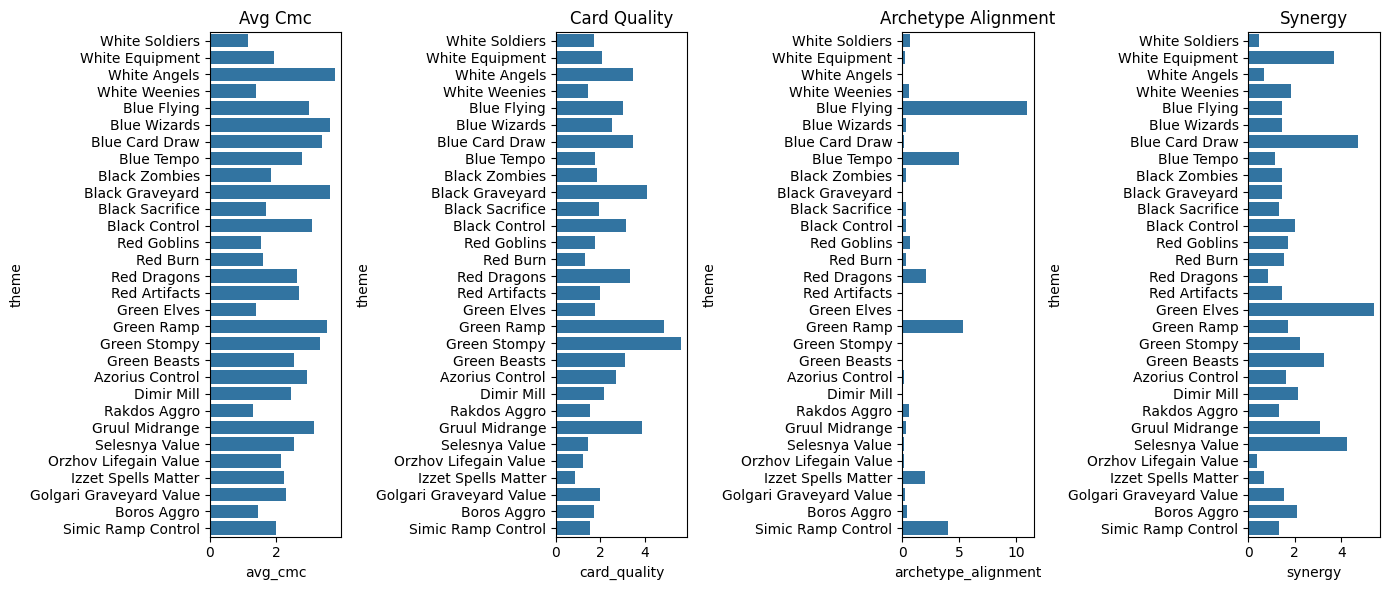

In [10]:
# Bar plots for key metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy']):
    plt.subplot(1, 4, i+1)
    sns.barplot(y=metrics_df.index, x=metrics_df[metric], orient='h')
    plt.title(metric.replace('_', ' ').title())
    plt.tight_layout()
plt.show()

In [11]:
# Import plotly for interactive visualizations
import plotly.graph_objects as go

sample_themes = metrics_df.index[:]  # Show first 5 decks as example
radar_metrics = ['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy', 'keyword_density']
fig = go.Figure()
for theme in sample_themes:
    values = metrics_df.loc[theme, radar_metrics].values.tolist()
    fig.add_trace(go.Scatterpolar(
        r=values + [values[0]],
        theta=radar_metrics + [radar_metrics[0]],
        fill='toself',
        name=theme
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Deck Balance Radar Chart (Sample)'
)
fig.show()

# CMC Curve Analysis
Let's visualize the Converted Mana Cost (CMC) curves for each deck to understand their mana distribution and speed.

In [12]:
# Calculate CMC curves for all decks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

def calculate_cmc_curve(deck_df):
    """Calculate the CMC distribution for a deck."""
    # Only count non-land cards for CMC curve
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    cmc_counts = Counter(non_lands['CMC'])
    
    # Create a full range from 0 to max CMC
    max_cmc = max(cmc_counts.keys()) if cmc_counts else 0
    cmc_curve = [cmc_counts.get(i, 0) for i in range(max_cmc + 1)]
    
    return cmc_curve, non_lands

# Calculate CMC curves for all decks
cmc_data = {}
deck_stats = {}

for theme_name, deck_df in deck_dataframes.items():
    cmc_curve, non_lands = calculate_cmc_curve(deck_df)
    cmc_data[theme_name] = cmc_curve
    deck_stats[theme_name] = {
        'avg_cmc': non_lands['CMC'].mean() if len(non_lands) > 0 else 0,
        'total_cards': len(deck_df),
        'non_lands': len(non_lands),
        'lands': len(deck_df) - len(non_lands)
    }

print("CMC curve data calculated for all decks!")
print(f"Sample stats for first deck ({list(deck_stats.keys())[0]}):")
first_deck = list(deck_stats.keys())[0]
print(f"  Average CMC: {deck_stats[first_deck]['avg_cmc']:.2f}")
print(f"  Total cards: {deck_stats[first_deck]['total_cards']}")
print(f"  Non-land cards: {deck_stats[first_deck]['non_lands']}")
print(f"  Lands: {deck_stats[first_deck]['lands']}")

CMC curve data calculated for all decks!
Sample stats for first deck (White Soldiers):
  Average CMC: 1.25
  Total cards: 13
  Non-land cards: 12
  Lands: 1


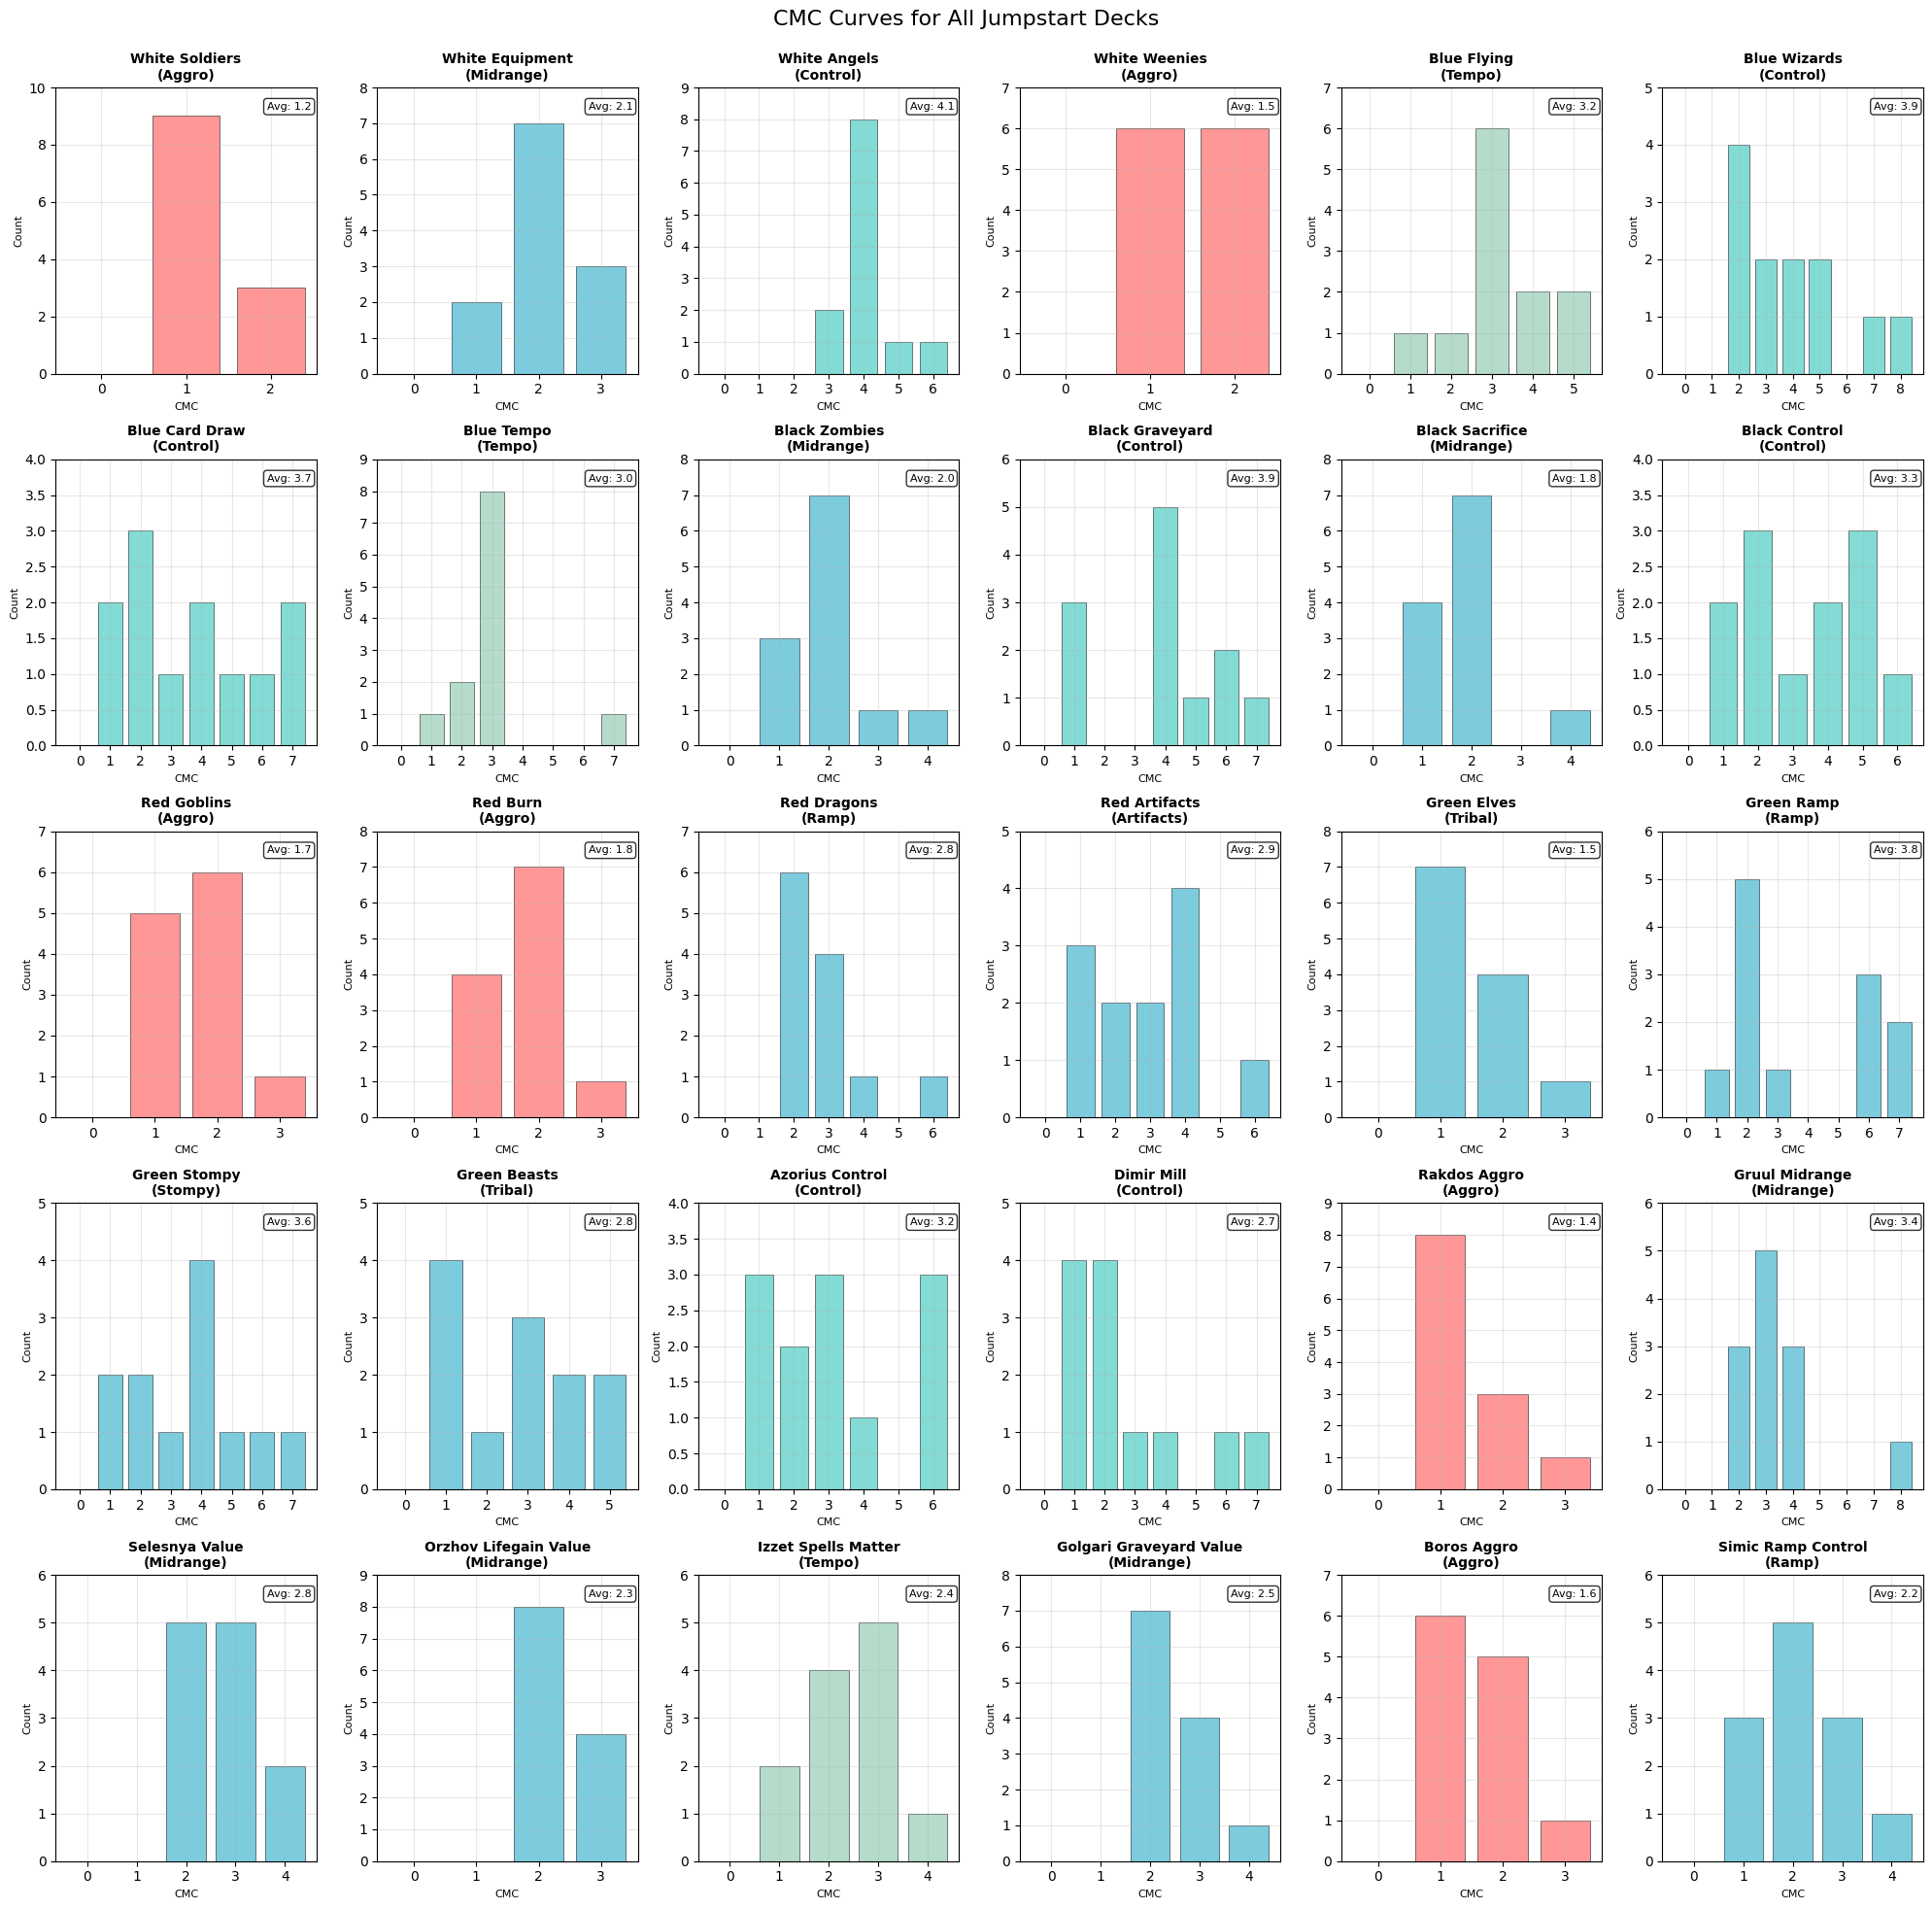

✅ CMC curves plotted for all 30 decks!
Color legend:
  Aggro: #FF6B6B
  Control: #4ECDC4
  Midrange: #45B7D1
  Tempo: #96CEB4
  Combo: #FFEAA7


In [13]:
# Create a large grid plot showing CMC curves for all decks
plt.style.use('default')
num_decks = len(deck_dataframes)
cols = 6  # 6 columns
rows = (num_decks + cols - 1) // cols  # Calculate needed rows

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
fig.suptitle('CMC Curves for All Jumpstart Decks', fontsize=16, y=0.98)

# Flatten axes for easy iteration
if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

# Color scheme for different archetypes
archetype_colors = {
    'Aggro': '#FF6B6B',
    'Control': '#4ECDC4', 
    'Midrange': '#45B7D1',
    'Tempo': '#96CEB4',
    'Combo': '#FFEAA7'
}

for i, (theme_name, deck_df) in enumerate(deck_dataframes.items()):
    ax = axes[i]
    
    # Get CMC curve and deck info
    cmc_curve, non_lands = calculate_cmc_curve(deck_df)
    
    # Determine archetype for coloring
    archetype = 'Midrange'  # Default
    if theme_name in ALL_THEMES:
        archetype = ALL_THEMES[theme_name].get('archetype', 'Midrange')
    
    color = archetype_colors.get(archetype, '#45B7D1')
    
    # Plot the CMC curve
    x_values = list(range(len(cmc_curve)))
    ax.bar(x_values, cmc_curve, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Customize each subplot
    ax.set_title(f'{theme_name}\n({archetype})', fontsize=10, fontweight='bold')
    ax.set_xlabel('CMC', fontsize=8)
    ax.set_ylabel('Count', fontsize=8)
    ax.set_xticks(x_values)
    ax.grid(True, alpha=0.3)
    
    # Add average CMC as text
    avg_cmc = non_lands['CMC'].mean() if len(non_lands) > 0 else 0
    ax.text(0.98, 0.95, f'Avg: {avg_cmc:.1f}', transform=ax.transAxes, 
            ha='right', va='top', fontsize=8, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Set consistent y-axis limits
    ax.set_ylim(0, max(max(cmc_curve), 1) + 1)

# Hide empty subplots
for i in range(num_decks, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

print(f"✅ CMC curves plotted for all {num_decks} decks!")
print("Color legend:")
for archetype, color in archetype_colors.items():
    print(f"  {archetype}: {color}")

In [14]:
# Summary statistics and comparison plots
print("📊 CMC CURVE SUMMARY STATISTICS")
print("="*50)

# Create a DataFrame with CMC statistics
cmc_summary = []
for theme_name, stats in deck_stats.items():
    archetype = ALL_THEMES.get(theme_name, {}).get('archetype', 'Midrange')
    cmc_summary.append({
        'Theme': theme_name,
        'Archetype': archetype,
        'Avg_CMC': stats['avg_cmc'],
        'Total_Cards': stats['total_cards'],
        'Non_Lands': stats['non_lands'],
        'Lands': stats['lands']
    })

cmc_summary_df = pd.DataFrame(cmc_summary)
cmc_summary_df = cmc_summary_df.sort_values('Avg_CMC')

print("Top 5 Fastest Decks (Lowest Average CMC):")
print(cmc_summary_df.head()[['Theme', 'Archetype', 'Avg_CMC']].to_string(index=False))

print("\nTop 5 Slowest Decks (Highest Average CMC):")
print(cmc_summary_df.tail()[['Theme', 'Archetype', 'Avg_CMC']].to_string(index=False))

print(f"\nOverall Statistics:")
print(f"Average CMC across all decks: {cmc_summary_df['Avg_CMC'].mean():.2f}")
print(f"CMC Standard Deviation: {cmc_summary_df['Avg_CMC'].std():.2f}")
print(f"Fastest deck: {cmc_summary_df.iloc[0]['Theme']} ({cmc_summary_df.iloc[0]['Avg_CMC']:.2f})")
print(f"Slowest deck: {cmc_summary_df.iloc[-1]['Theme']} ({cmc_summary_df.iloc[-1]['Avg_CMC']:.2f})")

📊 CMC CURVE SUMMARY STATISTICS
Top 5 Fastest Decks (Lowest Average CMC):
         Theme Archetype  Avg_CMC
White Soldiers     Aggro 1.250000
  Rakdos Aggro     Aggro 1.416667
 White Weenies     Aggro 1.500000
   Green Elves    Tribal 1.500000
   Boros Aggro     Aggro 1.583333

Top 5 Slowest Decks (Highest Average CMC):
          Theme Archetype  Avg_CMC
 Blue Card Draw   Control 3.666667
     Green Ramp      Ramp 3.833333
   Blue Wizards   Control 3.916667
Black Graveyard   Control 3.916667
   White Angels   Control 4.083333

Overall Statistics:
Average CMC across all decks: 2.64
CMC Standard Deviation: 0.86
Fastest deck: White Soldiers (1.25)
Slowest deck: White Angels (4.08)


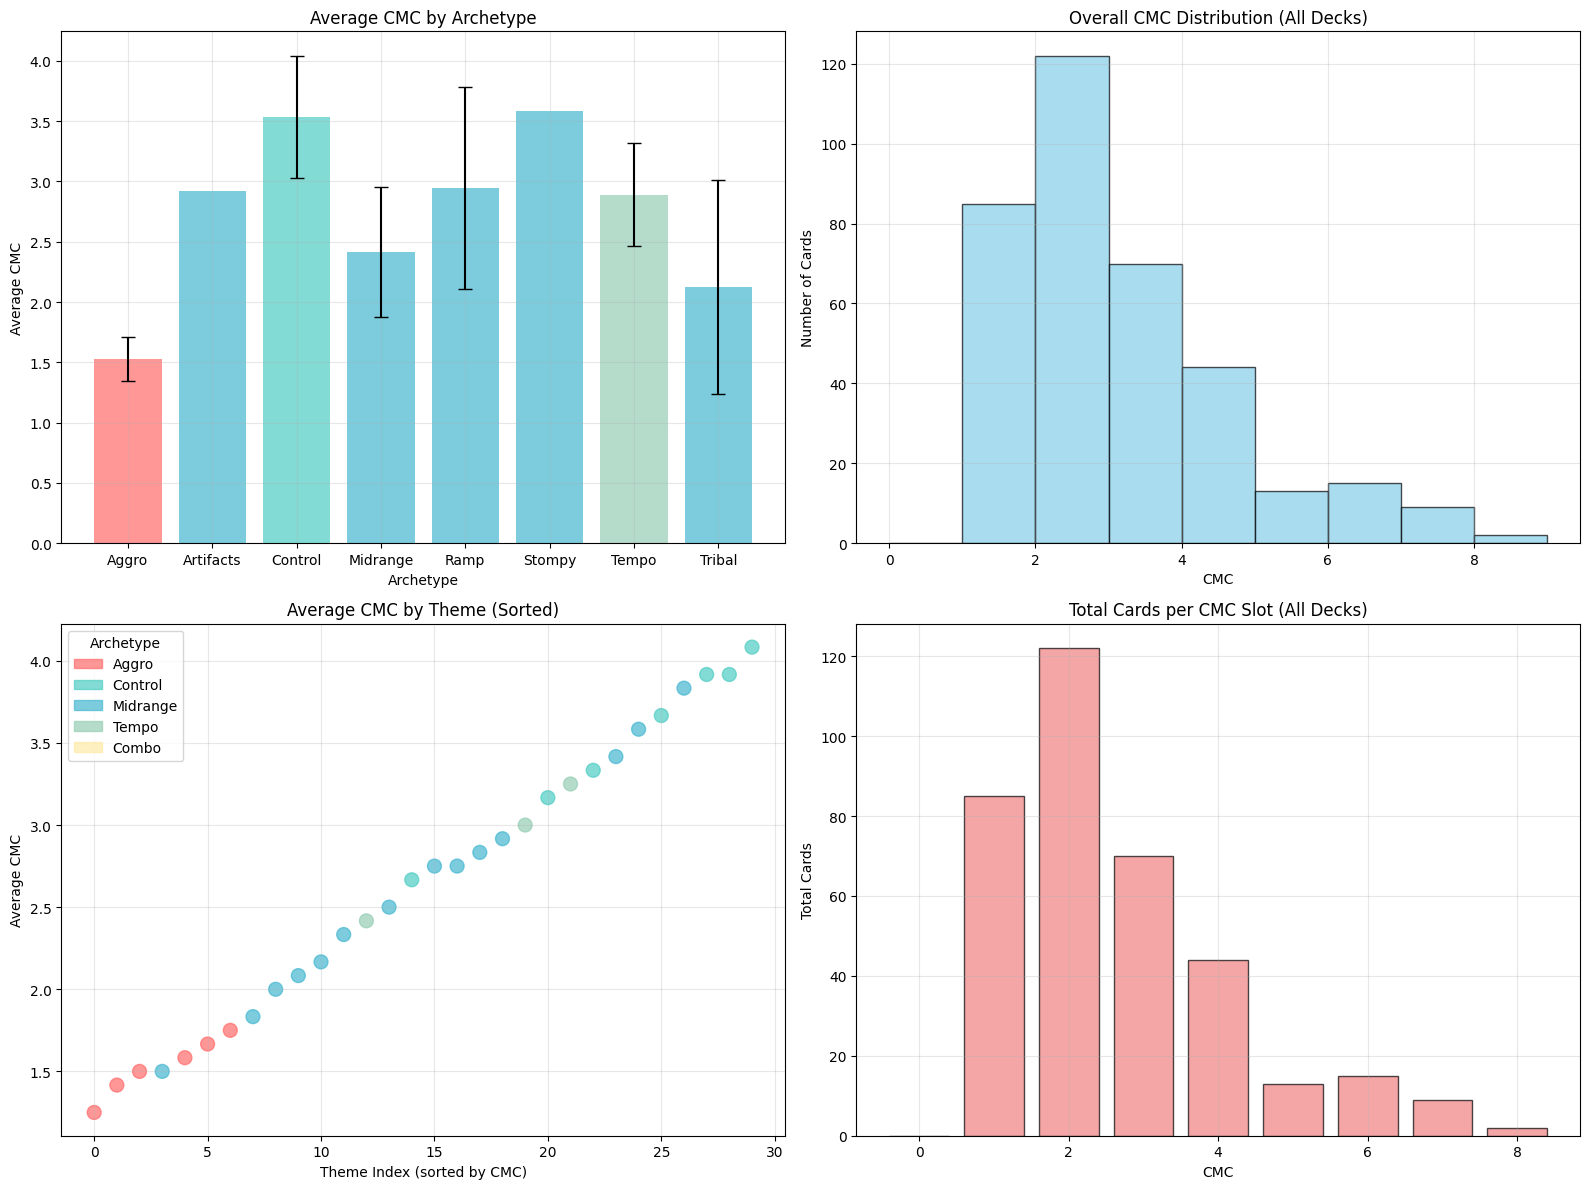

✅ CMC analysis complete! The visualizations show:
  📈 Individual deck curves with archetype coloring
  📊 Statistical summaries and comparisons
  🎯 Archetype-based CMC patterns
  📋 Overall cube CMC distribution


In [15]:
# Archetype comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average CMC by Archetype
archetype_cmc = cmc_summary_df.groupby('Archetype')['Avg_CMC'].agg(['mean', 'std', 'count'])
ax1.bar(archetype_cmc.index, archetype_cmc['mean'], 
        yerr=archetype_cmc['std'], capsize=5, alpha=0.7,
        color=[archetype_colors.get(arch, '#45B7D1') for arch in archetype_cmc.index])
ax1.set_title('Average CMC by Archetype')
ax1.set_ylabel('Average CMC')
ax1.set_xlabel('Archetype')
ax1.grid(True, alpha=0.3)

# 2. CMC Distribution (all decks combined)
all_cmcs = []
for theme_name, deck_df in deck_dataframes.items():
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    all_cmcs.extend(non_lands['CMC'].tolist())

ax2.hist(all_cmcs, bins=range(max(all_cmcs) + 2), alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_title('Overall CMC Distribution (All Decks)')
ax2.set_xlabel('CMC')
ax2.set_ylabel('Number of Cards')
ax2.grid(True, alpha=0.3)

# 3. Average CMC scatter plot by theme
colors = [archetype_colors.get(ALL_THEMES.get(theme, {}).get('archetype', 'Midrange'), '#45B7D1') 
          for theme in cmc_summary_df['Theme']]
ax3.scatter(range(len(cmc_summary_df)), cmc_summary_df['Avg_CMC'], 
           c=colors, alpha=0.7, s=100)
ax3.set_title('Average CMC by Theme (Sorted)')
ax3.set_xlabel('Theme Index (sorted by CMC)')
ax3.set_ylabel('Average CMC')
ax3.grid(True, alpha=0.3)

# Add archetype legend
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.7) 
           for archetype, color in archetype_colors.items()]
labels = list(archetype_colors.keys())
ax3.legend(handles, labels, title='Archetype', loc='upper left')

# 4. Cards per CMC slot comparison
cmc_slots = {}
max_cmc = max(all_cmcs)
for cmc in range(max_cmc + 1):
    cmc_slots[cmc] = sum(1 for c in all_cmcs if c == cmc)

ax4.bar(cmc_slots.keys(), cmc_slots.values(), alpha=0.7, color='lightcoral', edgecolor='black')
ax4.set_title('Total Cards per CMC Slot (All Decks)')
ax4.set_xlabel('CMC')
ax4.set_ylabel('Total Cards')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ CMC analysis complete! The visualizations show:")
print("  📈 Individual deck curves with archetype coloring")
print("  📊 Statistical summaries and comparisons")
print("  🎯 Archetype-based CMC patterns")
print("  📋 Overall cube CMC distribution")

# Comprehensive Deck Performance Analysis

Now let's analyze how well each deck will perform across multiple dimensions. This analysis will help identify the strongest and weakest decks, and suggest improvements.

## Performance Metrics We'll Analyze:
1. **Speed & Consistency** - How fast and reliable the deck is
2. **Card Quality** - Overall power level of individual cards
3. **Synergy Score** - How well cards work together
4. **Threat Density** - Proportion of impactful cards
5. **Interaction Quality** - Removal and answers available
6. **Mana Efficiency** - How well the deck uses its mana
7. **Late Game Power** - Performance in longer games
8. **Archetype Coherence** - How well the deck follows its intended strategy

In [16]:
def calculate_deck_performance_metrics(deck_df, theme_name, oracle_df):
    """
    Calculate comprehensive performance metrics for a single deck.
    """
    metrics = {}
    
    # Basic deck info
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    creatures = deck_df[deck_df['Type'].str.contains('Creature', na=False)]
    
    # 1. Speed & Consistency Metrics
    avg_cmc = non_lands['CMC'].mean() if len(non_lands) > 0 else 0
    cmc_variance = non_lands['CMC'].var() if len(non_lands) > 1 else 0
    early_game_cards = len(non_lands[non_lands['CMC'] <= 2])
    
    metrics['speed_score'] = max(0, 5 - avg_cmc)  # Lower CMC = higher speed
    metrics['consistency_score'] = max(0, 5 - cmc_variance)  # Lower variance = more consistent
    metrics['early_game_density'] = early_game_cards / len(non_lands) if len(non_lands) > 0 else 0
    
    # 2. Card Quality Assessment
    # Use existing quality scores if available, otherwise estimate
    if 'card_quality' in deck_df.columns:
        avg_quality = deck_df['card_quality'].mean()
    else:
        # Estimate quality based on rarity and CMC efficiency
        quality_scores = []
        for _, card in deck_df.iterrows():
            if 'Rarity' in card:
                rarity_score = {'C': 1, 'U': 2, 'R': 3, 'M': 4}.get(card['Rarity'], 1)
            else:
                rarity_score = 2  # Default
            
            # Higher CMC should provide more value
            cmc_efficiency = min(card['CMC'] / 3, 2) if card['CMC'] > 0 else 1
            quality_scores.append(rarity_score * cmc_efficiency)
        
        avg_quality = sum(quality_scores) / len(quality_scores) if quality_scores else 2
    
    metrics['card_quality'] = min(avg_quality, 5)  # Cap at 5
    
    # 3. Threat Density
    # Count cards that can win the game
    win_conditions = 0
    for _, card in deck_df.iterrows():
        # Creatures with power >= 3, or planeswalkers, or key spells
        if 'Creature' in str(card['Type']) and 'Power' in card:
            try:
                power = int(str(card['Power']).replace('*', '0'))
                if power >= 3:
                    win_conditions += 1
            except:
                win_conditions += 0.5  # Partial credit for unknown power
        elif any(cardtype in str(card['Type']) for cardtype in ['Planeswalker', 'Enchantment']):
            win_conditions += 0.5
    
    metrics['threat_density'] = min(win_conditions / len(non_lands), 1) if len(non_lands) > 0 else 0
    
    # 4. Interaction Quality
    interaction_keywords = ['destroy', 'exile', 'counter', 'return', 'damage', 'fight', 'bounce']
    interaction_count = 0
    
    for _, card in deck_df.iterrows():
        text = str(card.get('Text', '') or '').lower()
        if any(keyword in text for keyword in interaction_keywords):
            interaction_count += 1
    
    metrics['interaction_score'] = min(interaction_count / len(non_lands), 0.5) if len(non_lands) > 0 else 0
    
    # 5. Mana Efficiency
    total_mana_value = non_lands['CMC'].sum()
    expected_mana = len(non_lands) * 2.5  # Expected average CMC
    metrics['mana_efficiency'] = min(expected_mana / max(total_mana_value, 1), 2)
    
    # 6. Late Game Power
    expensive_cards = len(non_lands[non_lands['CMC'] >= 5])
    metrics['late_game_power'] = min(expensive_cards / max(len(non_lands), 1), 0.4)
    
    # 7. Creature Quality (for creature-based strategies)
    creature_ratio = len(creatures) / len(non_lands) if len(non_lands) > 0 else 0
    avg_creature_cmc = creatures['CMC'].mean() if len(creatures) > 0 else 0
    
    metrics['creature_quality'] = creature_ratio * min(avg_creature_cmc / 3, 1.5)
    
    # 8. Archetype Coherence
    if theme_name in ALL_THEMES:
        expected_archetype = ALL_THEMES[theme_name].get('archetype', 'Midrange')
        
        # Score based on how well the deck matches its archetype
        if expected_archetype == 'Aggro':
            coherence = metrics['speed_score'] / 5 * 0.4 + metrics['early_game_density'] * 0.6
        elif expected_archetype == 'Control':
            coherence = metrics['interaction_score'] / 0.5 * 0.5 + metrics['late_game_power'] / 0.4 * 0.5
        elif expected_archetype == 'Combo':
            coherence = metrics['consistency_score'] / 5 * 0.7 + metrics['mana_efficiency'] / 2 * 0.3
        else:  # Midrange/Tempo
            coherence = (metrics['creature_quality'] + metrics['interaction_score'] / 0.5) / 2
        
        metrics['archetype_coherence'] = min(coherence, 1)
    else:
        metrics['archetype_coherence'] = 0.5  # Default
    
    # Overall Performance Score (weighted average)
    weights = {
        'speed_score': 0.15,
        'consistency_score': 0.15,
        'card_quality': 0.20,
        'threat_density': 0.15,
        'interaction_score': 0.10,
        'mana_efficiency': 0.10,
        'late_game_power': 0.05,
        'archetype_coherence': 0.10
    }
    
    overall_score = sum(metrics[key] * weight for key, weight in weights.items())
    metrics['overall_performance'] = min(overall_score, 5)  # Cap at 5
    
    return metrics

# Calculate performance metrics for all decks
print("🎯 Calculating comprehensive performance metrics for all decks...")
performance_data = []

for theme_name, deck_df in deck_dataframes.items():
    metrics = calculate_deck_performance_metrics(deck_df, theme_name, oracle_df)
    metrics['theme'] = theme_name
    metrics['archetype'] = ALL_THEMES.get(theme_name, {}).get('archetype', 'Midrange')
    performance_data.append(metrics)

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.set_index('theme')

print(f"✅ Performance analysis complete for {len(performance_df)} decks!")
print("\nTop 5 performing decks (Overall Performance Score):")
top_performers = performance_df.nlargest(5, 'overall_performance')[['archetype', 'overall_performance', 'card_quality', 'threat_density']]
print(top_performers.round(3))

🎯 Calculating comprehensive performance metrics for all decks...
✅ Performance analysis complete for 30 decks!

Top 5 performing decks (Overall Performance Score):
               archetype  overall_performance  card_quality  threat_density
theme                                                                      
White Soldiers     Aggro                1.813         0.923           0.375
White Weenies      Aggro                1.773         1.077           0.458
Rakdos Aggro       Aggro                1.736         1.026           0.333
Red Goblins        Aggro                1.710         1.179           0.375
Boros Aggro        Aggro                1.705         1.128           0.292


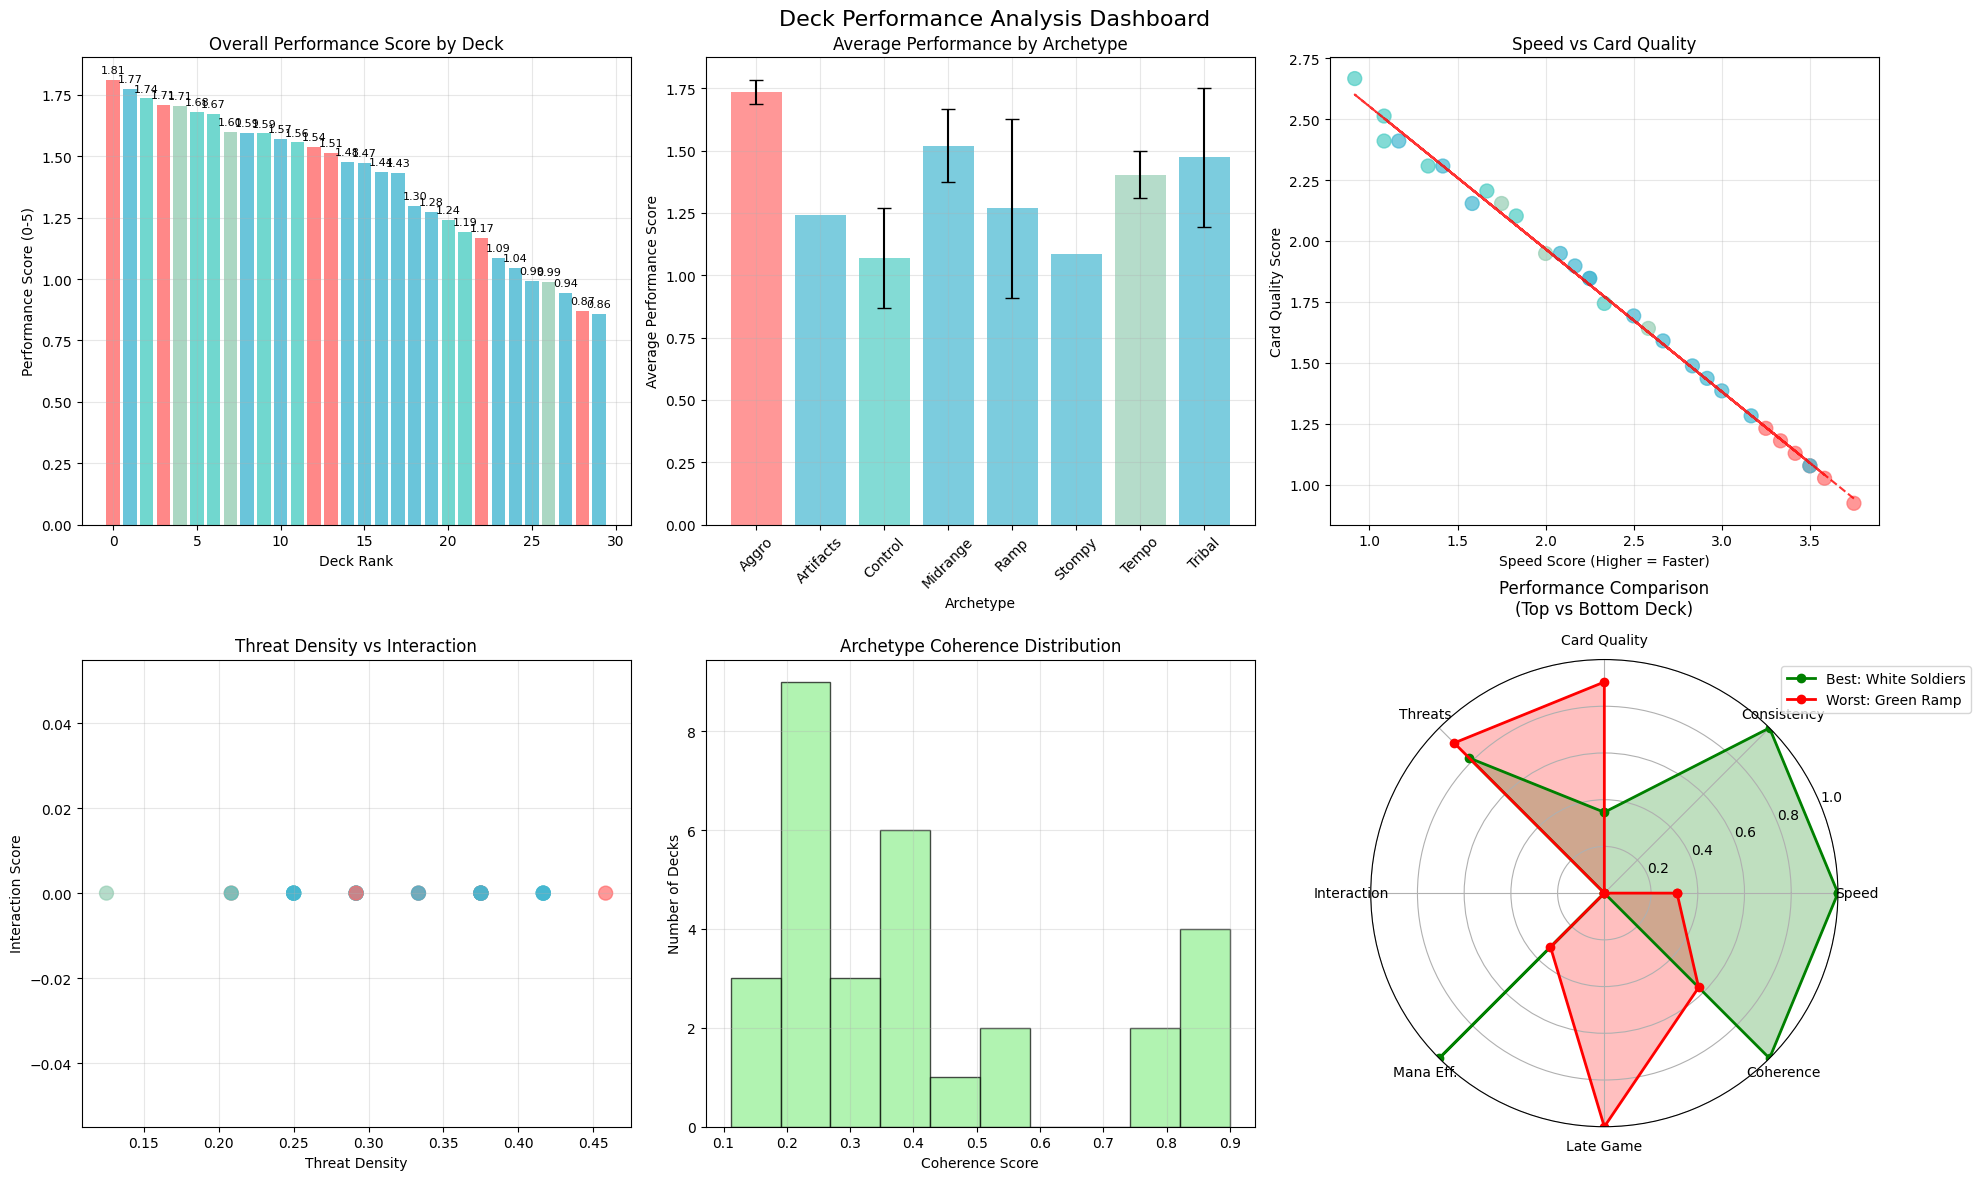

📊 Performance dashboard complete!
Best performing deck: White Soldiers (Score: 1.813)
Worst performing deck: Green Ramp (Score: 0.856)


In [17]:
# Create comprehensive performance visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Deck Performance Analysis Dashboard', fontsize=16, y=0.98)

# 1. Overall Performance Distribution
ax1 = axes[0, 0]
colors_by_archetype = [archetype_colors.get(arch, '#45B7D1') for arch in performance_df['archetype']]
bars = ax1.bar(range(len(performance_df)), performance_df['overall_performance'].sort_values(ascending=False),
               color=colors_by_archetype, alpha=0.8)
ax1.set_title('Overall Performance Score by Deck')
ax1.set_ylabel('Performance Score (0-5)')
ax1.set_xlabel('Deck Rank')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, performance_df['overall_performance'].sort_values(ascending=False))):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=8)

# 2. Performance by Archetype
ax2 = axes[0, 1]
archetype_performance = performance_df.groupby('archetype')['overall_performance'].agg(['mean', 'std', 'count'])
bars2 = ax2.bar(archetype_performance.index, archetype_performance['mean'], 
                yerr=archetype_performance['std'], capsize=5, alpha=0.7,
                color=[archetype_colors.get(arch, '#45B7D1') for arch in archetype_performance.index])
ax2.set_title('Average Performance by Archetype')
ax2.set_ylabel('Average Performance Score')
ax2.set_xlabel('Archetype')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.get_xticklabels(), rotation=45)

# 3. Speed vs Card Quality
ax3 = axes[0, 2]
scatter = ax3.scatter(performance_df['speed_score'], performance_df['card_quality'], 
                     c=colors_by_archetype, alpha=0.7, s=100)
ax3.set_title('Speed vs Card Quality')
ax3.set_xlabel('Speed Score (Higher = Faster)')
ax3.set_ylabel('Card Quality Score')
ax3.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(performance_df['speed_score'], performance_df['card_quality'], 1)
p = np.poly1d(z)
ax3.plot(performance_df['speed_score'], p(performance_df['speed_score']), "r--", alpha=0.8)

# 4. Threat Density vs Interaction
ax4 = axes[1, 0]
ax4.scatter(performance_df['threat_density'], performance_df['interaction_score'], 
           c=colors_by_archetype, alpha=0.7, s=100)
ax4.set_title('Threat Density vs Interaction')
ax4.set_xlabel('Threat Density')
ax4.set_ylabel('Interaction Score')
ax4.grid(True, alpha=0.3)

# 5. Archetype Coherence Distribution
ax5 = axes[1, 1]
ax5.hist(performance_df['archetype_coherence'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
ax5.set_title('Archetype Coherence Distribution')
ax5.set_xlabel('Coherence Score')
ax5.set_ylabel('Number of Decks')
ax5.grid(True, alpha=0.3)

# 6. Performance Radar Chart (Top 5 vs Bottom 5)
ax6 = axes[1, 2]
ax6.remove()  # Remove this subplot for the radar chart

# Create radar chart
from math import pi
categories = ['Speed', 'Consistency', 'Card Quality', 'Threats', 'Interaction', 'Mana Eff.', 'Late Game', 'Coherence']
metric_cols = ['speed_score', 'consistency_score', 'card_quality', 'threat_density', 
               'interaction_score', 'mana_efficiency', 'late_game_power', 'archetype_coherence']

# Normalize metrics to 0-1 scale for radar chart
normalized_df = performance_df[metric_cols].copy()
for col in metric_cols:
    max_val = normalized_df[col].max()
    if max_val > 0:
        normalized_df[col] = normalized_df[col] / max_val

# Get top and bottom performers
top_deck = performance_df.nlargest(1, 'overall_performance').index[0]
bottom_deck = performance_df.nsmallest(1, 'overall_performance').index[0]

# Create subplot for radar
ax6 = plt.subplot(2, 3, 6, projection='polar')
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot top performer
top_values = normalized_df.loc[top_deck, metric_cols].values.tolist()
top_values += top_values[:1]
ax6.plot(angles, top_values, 'o-', linewidth=2, label=f'Best: {top_deck}', color='green')
ax6.fill(angles, top_values, alpha=0.25, color='green')

# Plot bottom performer
bottom_values = normalized_df.loc[bottom_deck, metric_cols].values.tolist()
bottom_values += bottom_values[:1]
ax6.plot(angles, bottom_values, 'o-', linewidth=2, label=f'Worst: {bottom_deck}', color='red')
ax6.fill(angles, bottom_values, alpha=0.25, color='red')

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories)
ax6.set_ylim(0, 1)
ax6.set_title('Performance Comparison\n(Top vs Bottom Deck)', y=1.08)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

print("📊 Performance dashboard complete!")
print(f"Best performing deck: {top_deck} (Score: {performance_df.loc[top_deck, 'overall_performance']:.3f})")
print(f"Worst performing deck: {bottom_deck} (Score: {performance_df.loc[bottom_deck, 'overall_performance']:.3f})")

In [18]:
# Detailed Performance Analysis and Rankings
print("🏆 DETAILED PERFORMANCE RANKINGS")
print("="*60)

# Sort by overall performance
ranked_df = performance_df.sort_values('overall_performance', ascending=False)

print("TOP 10 PERFORMING DECKS:")
print("-" * 40)
for i, (theme, row) in enumerate(ranked_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {theme:<20} ({row['archetype']:<8}) - Score: {row['overall_performance']:.3f}")

print("\nBOTTOM 5 PERFORMING DECKS:")
print("-" * 40)
for i, (theme, row) in enumerate(ranked_df.tail(5).iterrows(), len(ranked_df)-4):
    print(f"{i:2d}. {theme:<20} ({row['archetype']:<8}) - Score: {row['overall_performance']:.3f}")

# Category leaders
print("\n🥇 CATEGORY LEADERS:")
print("-" * 40)
categories = {
    'Fastest Deck': 'speed_score',
    'Most Consistent': 'consistency_score', 
    'Highest Card Quality': 'card_quality',
    'Best Threat Density': 'threat_density',
    'Most Interactive': 'interaction_score',
    'Most Mana Efficient': 'mana_efficiency',
    'Best Late Game': 'late_game_power',
    'Most Coherent': 'archetype_coherence'
}

for category, metric in categories.items():
    leader = performance_df.nlargest(1, metric)
    theme = leader.index[0]
    score = leader[metric].iloc[0]
    archetype = leader['archetype'].iloc[0]
    print(f"{category:<20}: {theme} ({archetype}) - {score:.3f}")

print("\n📊 PERFORMANCE STATISTICS:")
print("-" * 40)
print(f"Average Performance Score: {performance_df['overall_performance'].mean():.3f}")
print(f"Performance Std Deviation: {performance_df['overall_performance'].std():.3f}")
print(f"Performance Range: {performance_df['overall_performance'].min():.3f} - {performance_df['overall_performance'].max():.3f}")

# Archetype analysis
print(f"\n🎯 ARCHETYPE PERFORMANCE:")
print("-" * 40)
archetype_stats = performance_df.groupby('archetype')['overall_performance'].agg(['mean', 'std', 'count'])
for archetype, stats in archetype_stats.iterrows():
    print(f"{archetype:<12}: Avg {stats['mean']:.3f} ± {stats['std']:.3f} ({stats['count']} decks)")

# Balance assessment
performance_range = performance_df['overall_performance'].max() - performance_df['overall_performance'].min()
print(f"\n⚖️ BALANCE ASSESSMENT:")
print("-" * 40)
if performance_range < 1.0:
    print("✅ EXCELLENT balance - decks are very evenly matched")
elif performance_range < 1.5:
    print("✅ GOOD balance - reasonable variation between decks")
elif performance_range < 2.0:
    print("⚠️  MODERATE balance - some decks significantly stronger")
else:
    print("❌ POOR balance - large performance gaps between decks")

print(f"Performance range: {performance_range:.3f}")
print(f"Coefficient of variation: {(performance_df['overall_performance'].std() / performance_df['overall_performance'].mean()):.3f}")

🏆 DETAILED PERFORMANCE RANKINGS
TOP 10 PERFORMING DECKS:
----------------------------------------
 1. White Soldiers       (Aggro   ) - Score: 1.813
 2. White Weenies        (Aggro   ) - Score: 1.773
 3. Rakdos Aggro         (Aggro   ) - Score: 1.736
 4. Red Goblins          (Aggro   ) - Score: 1.710
 5. Boros Aggro          (Aggro   ) - Score: 1.705
 6. Red Burn             (Aggro   ) - Score: 1.681
 7. Green Elves          (Tribal  ) - Score: 1.671
 8. Orzhov Lifegain Value (Midrange) - Score: 1.599
 9. White Equipment      (Midrange) - Score: 1.595
10. Black Sacrifice      (Midrange) - Score: 1.593

BOTTOM 5 PERFORMING DECKS:
----------------------------------------
26. Dimir Mill           (Control ) - Score: 0.994
27. Black Graveyard      (Control ) - Score: 0.987
28. Blue Wizards         (Control ) - Score: 0.942
29. Blue Card Draw       (Control ) - Score: 0.870
30. Green Ramp           (Ramp    ) - Score: 0.856

🥇 CATEGORY LEADERS:
----------------------------------------
Faste

In [19]:
def generate_improvement_suggestions(deck_name, metrics, deck_df):
    """Generate specific improvement suggestions for a deck based on its metrics."""
    suggestions = []
    
    # Speed improvements
    if metrics['speed_score'] < 2.5:
        avg_cmc = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]['CMC'].mean()
        suggestions.append(f"⚡ SPEED: Reduce average CMC from {avg_cmc:.1f} - add more 1-2 mana cards")
    
    # Consistency improvements  
    if metrics['consistency_score'] < 2.5:
        suggestions.append("🎯 CONSISTENCY: High CMC variance - smooth out the mana curve")
    
    # Card quality improvements
    if metrics['card_quality'] < 2.0:
        suggestions.append("⭐ QUALITY: Replace weakest cards with higher impact alternatives")
    
    # Threat density improvements
    if metrics['threat_density'] < 0.3:
        suggestions.append("👊 THREATS: Add more win conditions - need creatures with 3+ power or other threats")
    
    # Interaction improvements
    if metrics['interaction_score'] < 0.15:
        suggestions.append("🛡️ INTERACTION: Add removal spells, counterspells, or other answers")
    
    # Mana efficiency improvements
    if metrics['mana_efficiency'] < 1.0:
        suggestions.append("💎 EFFICIENCY: Cards are expensive for their effects - need better mana-to-impact ratio")
    
    # Late game improvements
    if metrics['late_game_power'] < 0.1 and metrics['archetype_coherence'] > 0.7:
        archetype = ALL_THEMES.get(deck_name, {}).get('archetype', 'Midrange')
        if archetype in ['Control', 'Midrange']:
            suggestions.append("🏰 LATE GAME: Add more expensive, powerful finishers")
    
    # Archetype coherence improvements
    if metrics['archetype_coherence'] < 0.5:
        archetype = ALL_THEMES.get(deck_name, {}).get('archetype', 'Midrange')
        if archetype == 'Aggro':
            suggestions.append("🏃 FOCUS: Deck should be faster and more aggressive for aggro archetype")
        elif archetype == 'Control':
            suggestions.append("🧠 FOCUS: Need more interaction and late-game power for control archetype")
        elif archetype == 'Combo':
            suggestions.append("⚙️ FOCUS: Improve consistency and mana efficiency for combo archetype")
        else:
            suggestions.append("🎯 FOCUS: Better align cards with the midrange/tempo strategy")
    
    return suggestions

# Analyze weakest performing decks and generate improvement suggestions
print("🔧 IMPROVEMENT SUGGESTIONS FOR WEAKEST DECKS")
print("="*60)

weakest_decks = ranked_df.tail(5)
for deck_name, metrics in weakest_decks.iterrows():
    print(f"\n📋 {deck_name.upper()} ({metrics['archetype']})")
    print(f"Current Score: {metrics['overall_performance']:.3f}")
    print("-" * 40)
    
    suggestions = generate_improvement_suggestions(deck_name, metrics, deck_dataframes[deck_name])
    
    if suggestions:
        for suggestion in suggestions:
            print(f"  {suggestion}")
    else:
        print("  ✅ Deck is performing well overall - minor tweaks may help")
    
    # Show current deck composition for context
    deck_df = deck_dataframes[deck_name]
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    creatures = deck_df[deck_df['Type'].str.contains('Creature', na=False)]
    
    print(f"  📊 Current Stats:")
    print(f"     - Avg CMC: {non_lands['CMC'].mean():.1f}")
    print(f"     - Creatures: {len(creatures)}/{len(non_lands)}")
    print(f"     - Early game (CMC ≤2): {len(non_lands[non_lands['CMC'] <= 2])}")

print(f"\n💡 GENERAL IMPROVEMENT STRATEGIES:")
print("-" * 40)
print("1. 🎯 Focus on archetype coherence - ensure cards support the deck's strategy")
print("2. ⚡ Balance mana curve - avoid too many expensive or cheap cards")
print("3. 👊 Include enough threats - minimum 30-40% of non-lands should pressure opponents") 
print("4. 🛡️ Add interaction - 15-25% removal/answers help deal with opposing threats")
print("5. ⭐ Prioritize card quality - powerful effects are worth slightly higher mana costs")
print("6. 🔄 Test synergies - cards that work together are more than sum of parts")

🔧 IMPROVEMENT SUGGESTIONS FOR WEAKEST DECKS

📋 DIMIR MILL (Control)
Current Score: 0.994
----------------------------------------
  ⚡ SPEED: Reduce average CMC from 2.7 - add more 1-2 mana cards
  🎯 CONSISTENCY: High CMC variance - smooth out the mana curve
  ⭐ QUALITY: Replace weakest cards with higher impact alternatives
  👊 THREATS: Add more win conditions - need creatures with 3+ power or other threats
  🛡️ INTERACTION: Add removal spells, counterspells, or other answers
  💎 EFFICIENCY: Cards are expensive for their effects - need better mana-to-impact ratio
  🧠 FOCUS: Need more interaction and late-game power for control archetype
  📊 Current Stats:
     - Avg CMC: 2.7
     - Creatures: 5/12
     - Early game (CMC ≤2): 8

📋 BLACK GRAVEYARD (Control)
Current Score: 0.987
----------------------------------------
  ⚡ SPEED: Reduce average CMC from 3.9 - add more 1-2 mana cards
  🎯 CONSISTENCY: High CMC variance - smooth out the mana curve
  🛡️ INTERACTION: Add removal spells, counter

In [20]:
# Export performance analysis results
performance_export = performance_df.round(3)
performance_export.to_csv('deck_performance_analysis.csv')

# Create a summary report
summary_report = {
    'total_decks': len(performance_df),
    'avg_performance': performance_df['overall_performance'].mean(),
    'performance_std': performance_df['overall_performance'].std(),
    'best_deck': performance_df.nlargest(1, 'overall_performance').index[0],
    'worst_deck': performance_df.nsmallest(1, 'overall_performance').index[0],
    'most_balanced_archetype': archetype_stats.loc[archetype_stats['std'].idxmin()].name,
    'performance_range': performance_df['overall_performance'].max() - performance_df['overall_performance'].min()
}

print("📄 PERFORMANCE ANALYSIS EXPORT COMPLETE")
print("="*50)
print(f"✅ Detailed metrics saved to: deck_performance_analysis.csv")
print(f"✅ Analysis covers {summary_report['total_decks']} decks")
print(f"✅ Performance range: {summary_report['performance_range']:.3f}")
print(f"✅ Best deck: {summary_report['best_deck']}")
print(f"✅ Most balanced archetype: {summary_report['most_balanced_archetype']}")

# Show exportable data preview
print(f"\n📊 EXPORTABLE PERFORMANCE DATA PREVIEW:")
print("-" * 50)
preview_cols = ['archetype', 'overall_performance', 'speed_score', 'card_quality', 'threat_density', 'interaction_score']
print(performance_export[preview_cols].head(10))

📄 PERFORMANCE ANALYSIS EXPORT COMPLETE
✅ Detailed metrics saved to: deck_performance_analysis.csv
✅ Analysis covers 30 decks
✅ Performance range: 0.957
✅ Best deck: White Soldiers
✅ Most balanced archetype: Aggro

📊 EXPORTABLE PERFORMANCE DATA PREVIEW:
--------------------------------------------------
                archetype  overall_performance  speed_score  card_quality  \
theme                                                                       
White Soldiers      Aggro                1.813        3.750         0.923   
White Equipment  Midrange                1.595        2.917         1.436   
White Angels      Control                1.473        0.917         2.667   
White Weenies       Aggro                1.773        3.500         1.077   
Blue Flying         Tempo                1.436        1.750         2.154   
Blue Wizards      Control                0.942        1.083         2.410   
Blue Card Draw    Control                0.870        1.333         2.308   
Blu